

<u><b>Lab - 4 : </b></u> Harris Corner Detection

OBJECTIVE
To detect and visualize the corners (i.e., interest points or feature points) in an image using the Harris Corner Detection algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

Reading and Displaying Image

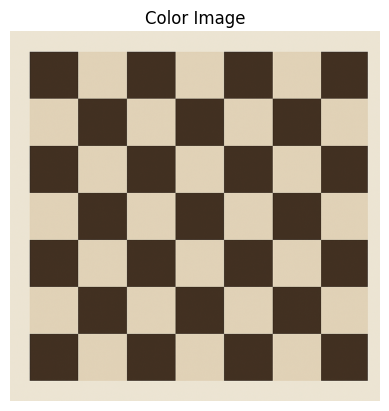

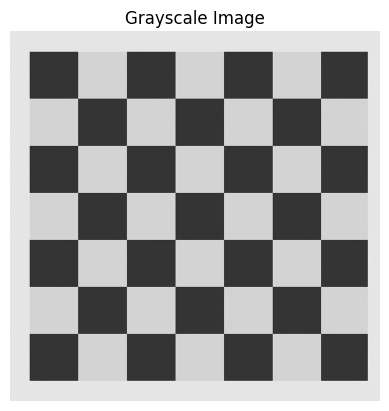

In [2]:
img = cv2.imread("chessboard.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = np.float32(img_gray)

plt.imshow(img_rgb)
plt.axis("off")
plt.title("Color Image")
plt.show()

plt.imshow(img_gray, cmap='gray')
plt.axis("off")
plt.title("Grayscale Image")
plt.show()

Image Gradients with Sobel Filters

To measure changes in intensity in x and y directions, i.e., gradients.

This tells us where the image is changing rapidly – possible edges or corners.

In [3]:
sobel_y=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
sobel_x=sobel_y.T
print("sobel_x")
print(sobel_x)

print("sobel_y")
print(sobel_y)

sobel_x
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
sobel_y
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


In [4]:
Ix=cv2.filter2D(img_gray,-1,sobel_x)
Iy=cv2.filter2D(img_gray,-1,sobel_y)

Computing Structure Tensor (Matrix M)
We apply Gaussian blur to smooth the values and suppress noise in local neighborhood.

In [5]:
Ixx=cv2.GaussianBlur(Ix*Ix,(3,3),1)
Iyy=cv2.GaussianBlur(Iy*Iy,(3,3),1)
Ixy=cv2.GaussianBlur(Ix*Iy,(3,3),1)

In [8]:
detM=Ixx*Iyy-(Ixy)**2
traceM=Ixx+Iyy
# Calculating lamda
sqrt_term = np.sqrt((traceM ** 2) - 4 * detM)
lambda1 = (traceM + sqrt_term) / 2
#lambda 2 = (traceM - sqrt_term) / 2

C:\Users\ADIDAS\AppData\Local\Temp\ipykernel_8080\3021561932.py:4: RuntimeWarning: invalid value encountered in sqrt
  sqrt_term = np.sqrt((traceM ** 2) - 4 * detM)


In [6]:
def harris_corner(image, harris_response):
    # Copy image for marking corners
    img_corners_only = np.copy(image)

    # Highlight only the corners
    for row_index, response in enumerate(harris_response):
        for col_index, r in enumerate(response):
            if r > 100:
                img_corners_only[row_index, col_index] = [255, 0, 0]  # Red

    # Plot
    plt.figure(figsize=(8, 8))
    plt.title("Corners Found (Only)")
    plt.imshow(img_corners_only)
    plt.axis("off")
    plt.show()

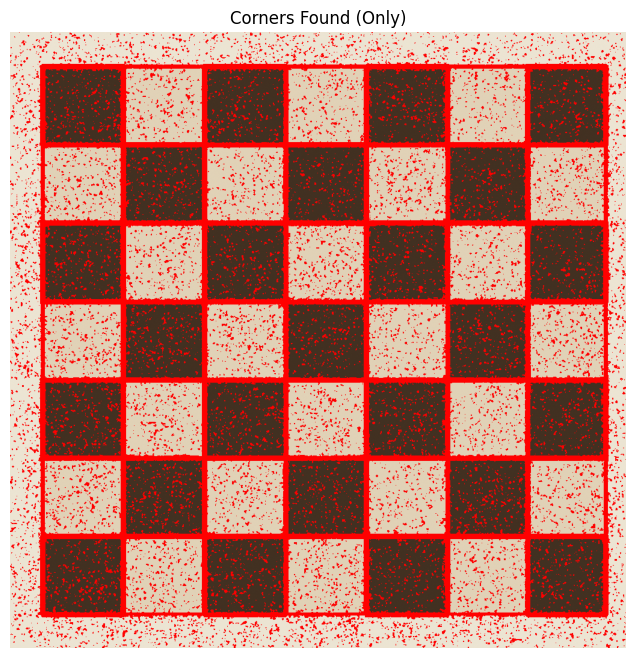

In [9]:
k=0.05
harris_response=detM-k*(traceM)
harris_corner(img_rgb, harris_response)

C:\Users\ADIDAS\AppData\Local\Temp\ipykernel_8080\1933237898.py:1: RuntimeWarning: invalid value encountered in divide
  harris_response = detM / traceM


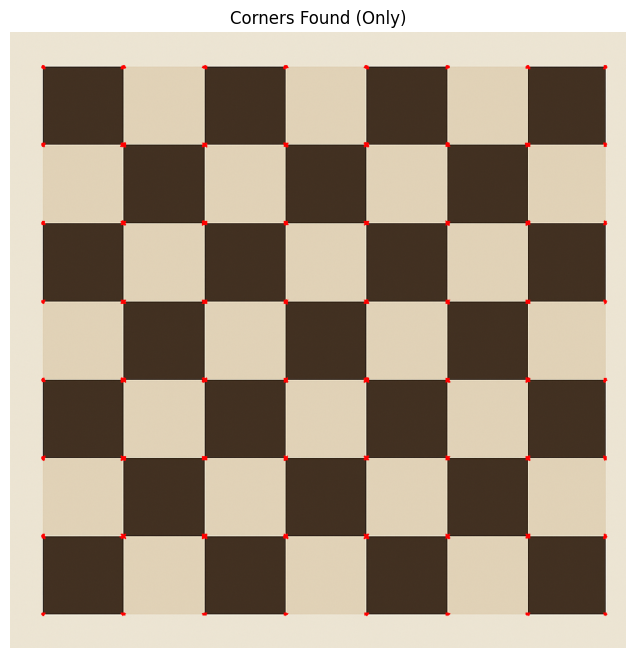

In [11]:
harris_response = detM / traceM
harris_corner(img_rgb, harris_response)

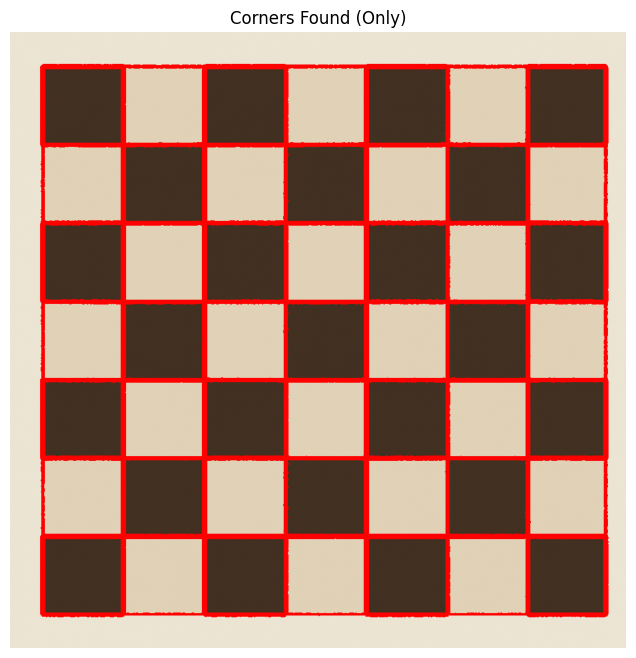

In [12]:
harris_response= lambda1
harris_corner(img_rgb, harris_response)

Conclusion

Harris Corner Detection is a simple yet powerful technique to identify interest points in an image. With just a few lines of code, you can visualize and understand the structure hidden within images.